In [1]:
from __future__ import unicode_literals
import numpy as np
from scipy.optimize import fsolve, brentq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit




def equations(p,eps):
    k, l = p
    return (eps * np.cos(k*l)+k**2-k**4, -eps*l*np.sin(k*l) + 2*k - 4*k**3)

e = -np.logspace(np.log10(.25), np.log10(5), num=10000)
n = len(e)
sol = np.zeros((len(e),2))

for i in range(len(e)):
    sol[i,0:2] = fsolve(equations, (1,1), args=(e[i]))

k = abs(sol[:,0])    
L = abs(sol[:,1])
phi = k*L

I = np.argmax(L)

### Interpolaciones de los parametros
k_c = interp1d(e, k, kind='cubic')
L_c = interp1d(e, L, kind='cubic')
phi_function = interp1d(e, phi, kind='cubic')


def L_function(eps):
    if eps <-.25:
        return L_c(eps)
    else:
        return 0
def k_function(eps):
    if eps < -.25:
        return k_c(eps)
    else:
        return np.sqrt(.5)
    
def closest_point(point):    
    eps, l = point
    E = np.arange(-5, -.249999, .0001)
    L = L_c(E)
    y = l - L
    x = eps - E
    d = np.sqrt(x**2 + y**2)
    i = np.argmin(d)
    return E[i], L[i]

def delta_l(point):
    x,y = point
    e_c, l_c = closest_point(point)
    return y - l_c

def delta_e(point):
    x,y = point
    e_c, l_c = closest_point(point)
    return x - e_c
    
        
point = (0,1.0)
print delta_l(point)
print delta_e(point)
print closest_point(point)



0.0659944784032
0.321900000011
(-0.32190000001090269, 0.93400552159683192)


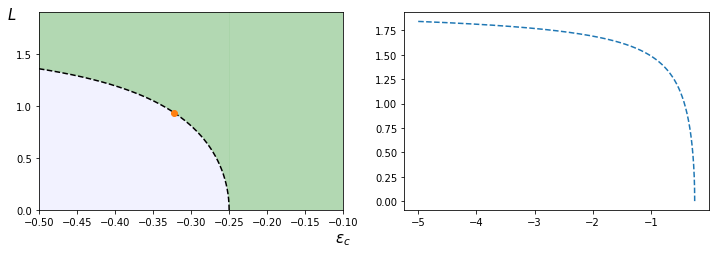

In [2]:
### Graficos!

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221) #  De L
ax2 = fig.add_subplot(222) #  De k

ax1.plot(e, L, '--',color='black')
ax1.plot(point[0], point[1],'o')
ax1.plot(closest_point(point)[0], closest_point(point)[1],'o')
#ax1.set_aspect('equal')
ax2.plot(e, phi, '--')

ax1.set_ylim((0,1.9))
ax1.set_xlabel(r'$\varepsilon_c$', fontsize=15, x = 1)
ax1.set_ylabel(r'$L$',rotation=0, fontsize = 15, y = .95)
ax1.set_yticks(np.arange(0,2,.5))
ax1.set_xlim((-.5,-0.1))
ax1.fill_between(e, 0, L, facecolor='blue', interpolate=True, alpha=.05)
ax1.fill_between(e, L, 1.9, facecolor='green', interpolate=True, alpha=.3)
ax1.fill_between(np.arange(-.25, 0.1,.1), 0, 1.9, facecolor='green', interpolate=True, alpha=.3)
#ax1.text(-3,.8,'Estable', fontsize=15)
#ax1.text(-3,1.7,'Inestable', fontsize=15)
#ax1.set_xticks([-5,-2.5, -.25])


'''
ax2.set_ylim((np.min(k),1.4))
ax2.set_xlabel(r'$\varepsilon_c$', fontsize=15, x = 1)
ax2.set_ylabel(r'$k_c$',rotation=0, fontsize = 15, y = .95)
ax2.set_yticks(np.arange(0.8,1.4,.2))
ax2.set_xlim((-5,0))
ax2.text(-1,1.3 , r'$\nu=1$',fontsize=15, 
         bbox=dict(facecolor='white', alpha=0.8))
'''
plt.show()

In [2]:
def alpha(e, l):
    eps, L = closest_point((e,l))
    k = k_function(eps)
    phi = k*L
    delta = l - L
    gamma = eps*np.exp(1j*phi)*(np.exp(1j*k*delta) -1)
    exp = np.exp(1j*phi)
    phase = np.angle(eps*(l)**2/2*exp + gamma*(l)**2/2 - 1 + 6*k**2)
    return np.tan(phase)

def beta(e,l):
    eps, L = closest_point((e,l))
    k = k_function(eps)
    phi = k*L
    #return (k*l*np.cos(phi) + np.sin(phi))/(np.cos(phi)-k*l*np.sin(phi))
    return np.tan(k*l)

def beta_angle(e, l):
    eps, L = closest_point((e,l))
    k = k_function(eps)
    return k*l


#Grafica un punto como funcion de alpha y beta
def plot_chate(bet, alph):
    x_cor = int(bet*60 + 600)
    y_cor = int(-446/6.5*alph+ 446 - 2*446/6.5)
    
    i = plt.imread('bif2.png')
    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(111)
    
    ax.imshow(i)
    plt.xticks(600/5* np.arange(0,11), [-10,-8,-6,-4,-2,0, 2, 4,6,8,10])
    plt.yticks(446 - 2*446/6.5 * np.arange(-1,4), [-4,-2 , 0, 2, 4])
    ax.plot(x_cor, y_cor, 'o')
    return fig

delta_e((-.8, 1.56))

0.0068000000097725444

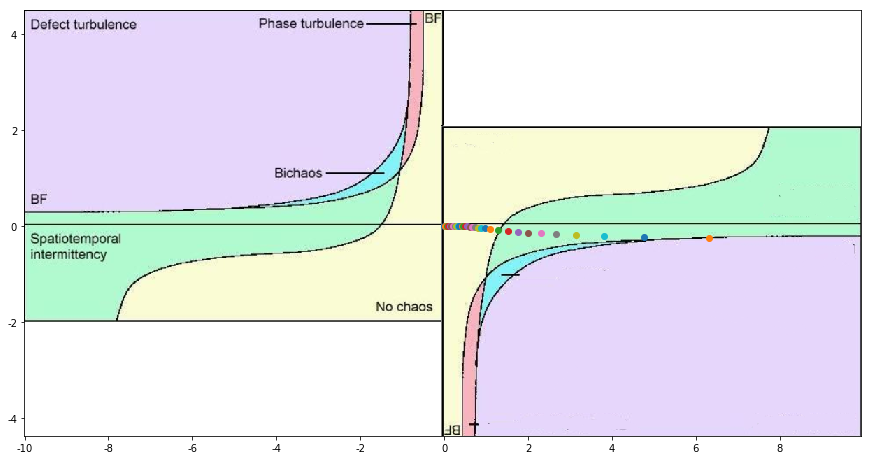

In [3]:

#Grafica un punto, en funcion de eps y l
def plot_chate_2(eps,l):
    bet=beta(eps,l)
    alph = alpha(eps,l)
    #L = L_function(eps)
    #print 'eps = '+str(eps), 'L_c = '+str(L_function(eps))[0:5], 'L = '+str(l)[0:5]
    #print 'alph = '+str(alph)[0:5],'beta = '+str(bet)[0:5]
    ax = plot_chate(bet,alph).axes[0]
    #ax.text(1000,50,r'$\varepsilon_c = $'+str(eps), fontsize= 15)
    #ax.text(1000,80,r'$L = $'+str(L + l)[0:5], fontsize= 15)
    plt.show()


    #Grafica una curva
def plot_chate_3(eps):
    i = plt.imread('bif2.png')
    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(111)
    ax.imshow(i)
    #ax.text(1000,50,r'$\varepsilon_c = $'+str(eps), fontsize= 15)
    plt.xticks(600/5* np.arange(0,11), [-10,-8,-6,-4,-2,0, 2, 4,6,8,10])
    plt.yticks(446 - 2*446/6.5 * np.arange(-1,4), [-4,-2 , 0, 2, 4])
    
    for l in np.arange(0,1.6,.05):
        bet = beta(eps,l)
        alph = alpha(eps,l)  
        
        x_cor = int(bet*60 + 600)
        y_cor = int(-446/6.5*alph+ 446 - 2*446/6.5)
        ax.plot(x_cor, y_cor, 'o')
    plt.show()



def alpha_in_diagram(y):
    return - 6.5/446.0*(y - 446.0 + 2*446.0/6.5 )

def beta_in_diagram(x):
    return (x - 600.0)/60.0

def model_function(beta, a, b, c, beta_0):
    x = beta - beta_0
    return a*np.sinh(b*x) + c
    #return a*(np.exp(-b*x) + np.exp(d*x)) + c

x_inter = np.array([134, 145,183,218 ,250,309,363,424,474,512,521,526,533,540,544,548,550,552])
y_inter = np.array([439, 406,375, 365,357,350,347,342,329,306,292,277,251,214,182,137,91,42])

alpha_inter = alpha_in_diagram(y_inter)
beta_inter = beta_in_diagram(x_inter)

constants = curve_fit(model_function, beta_inter, alpha_inter)
intermitency_curve = interp1d(beta_inter, alpha_inter)

def i_curve(beta):
    if beta <0 :
        if beta <= np.max(beta_inter) and beta >= np.min(beta_inter):
            return np.float(intermitency_curve(beta))
        elif beta > np.max(beta_inter):
            return alpha_inter[-1] + (alpha_inter[-1] - alpha_inter[-2])/(beta_inter[-1] - beta_inter[-2])*(beta - beta_inter[-1])
        elif  beta < np.min(beta_inter):
            return alpha_inter[0] + (alpha_inter[1] - alpha_inter[0])/(beta_inter[1] - beta_inter[0])*(beta - beta_inter[0])
    elif beta >=0:
        return -i_curve(-beta)

def i_curve_2(beta):
    if beta <=0:
        return model_function(beta, A, B, C, B0)
    else:
        return -model_function(-beta, A, B, C, B0)
    
plot_chate_3(-.8)


In [4]:

A,B,C,B0 = constants[0]
b = np.arange(-8,-.7, .01)
a=np.array(map(i_curve, b))
plt.plot(beta_inter, alpha_inter, '.')
plt.plot(b, model_function(b, A, B, C, B0), '--')
#plt.plot(b,a, '--')





In [5]:
eps = np.arange(-1.0, 0.5, .01)
l = np.arange(.1, 1.6, .01)

X, Y = np.meshgrid(eps, l)
U = np.zeros((len(X), len(X[0])))

for i in range(len(X)):
    for j in range(len(X[0])):
         U[i][j] = L_function(X[i][j]) 
            
#Y = Y + U


        

Z1 = np.zeros((len(X), len(X[0])))
Z2 = np.zeros((len(X), len(X[0])))
Z4 = np.zeros((len(X), len(X[0])))
Z5 = np.zeros((len(X), len(X[0])))
Z6 = np.zeros((len(X), len(X[0])))



In [6]:
for i in range(len(X)):
    for j in range(len(X[0])):
        Z1[i][j] = alpha(X[i][j], Y[i][j])   #Alpha
        Z2[i][j] = beta(X[i][j], Y[i][j])      #beta 
        Z6[i][j] = i_curve_2(Z2[i][j]) #intermitencia sinh
        
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


KeyboardInterrupt: 

<a list of 18 text.Text objects>

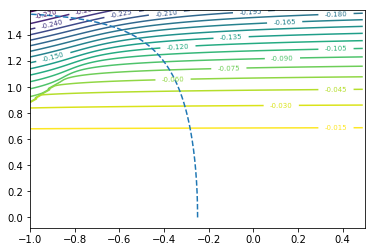

In [13]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z1, 20)
ax.plot(e, map(L_function,e), '--')
ax.set_xlim((-1 ,.5))
ax.clabel(CS, inline=1, fontsize=7)
        
    


<a list of 7 text.Text objects>

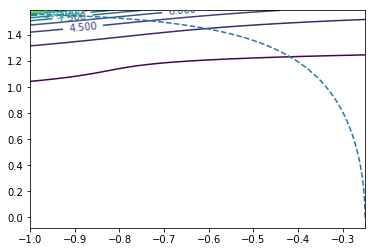

In [11]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z2, 15)
ax.plot(e, map(L_function,e), '--')
ax.set_xlim((-1.0 ,-.25))
ax.clabel(CS, inline=1, fontsize=10)

<a list of 1 text.Text objects>

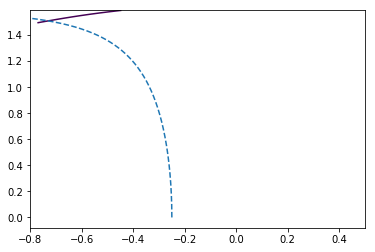

In [10]:
Z3 = Z1*Z2
fig, ax = plt.subplots()
CS = ax.contour(X, Y,Z3  , [-1])
ax.plot(e, map(L_function,e), '--')
ax.set_xlim((-.8 ,.5))
ax.clabel(CS, inline=1, fontsize=10)

<a list of 1 text.Text objects>

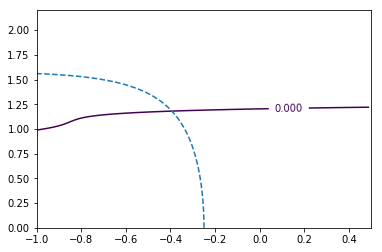

In [14]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z6-Z1, [0])
#CS2 = ax.contour(X, U+Y,Z3  , [-1])
ax.plot(e, map(L_function,e), '--')
ax.set_xlim((-1.0 ,.5))
ax.set_ylim((0, 2.2))
ax.clabel(CS, inline=1, fontsize=10)



In [5]:
E = np.arange(-1.0, .5, .001)
sol_l_inter = np.zeros(len(E))
sol_l_bf = np.zeros(len(E))

def eq_intermitency(l, eps):
    a = alpha(eps, l)
    b = beta(eps, l)
    return a - i_curve_2(b)

def eq_bf(l, eps):
    a = alpha(eps, l)
    b = beta(eps, l)
    return a*b+1
    

for i in range(len(E)):
    sol_l_inter[i] = fsolve(eq_intermitency, 1.25, args=(E[i]))[0]
    sol_l_bf[i] = fsolve(eq_bf, 1.5, args=(E[i]))[0]
    print i
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224


C:\Users\Asus\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474


C:\Users\Asus\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277


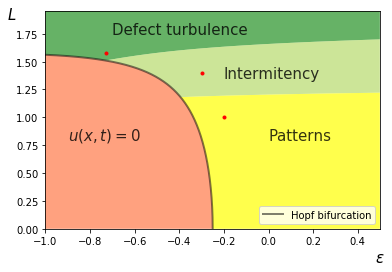

In [8]:
bf_function = interp1d(E, sol_l_bf)
inter_function = interp1d(E, sol_l_inter)

def root_bf(e):
    return bf_function(e) - L_function(e)

def root_inter(e):
    return inter_function(e) - L_function(e)

e_bf = brentq(root_bf, -.8, -.6)
e_inter = brentq(root_inter, -.45, -.3)

color_limit_intermitency = []

for f in E[E >= e_bf]:
    if f <= e_inter:
        color_limit_intermitency.append(L_function(f))
    else:
        color_limit_intermitency.append(inter_function(f))

color_limit_intermitency = np.array(color_limit_intermitency)

color_limit_defect = []

for f in E:
    if f <= e_bf:
        color_limit_defect.append(L_function(f))
    else:
        color_limit_defect.append(bf_function(f))

color_limit_defect = np.array(color_limit_defect)

color='red'

fig_2 = plt.figure()
ax = fig_2.add_subplot(111)
#ax.plot(E[E >= e_inter], sol_l_inter[E >= e_inter], '--', color='gray', linewidth=2, label='Transición a intermitencia')
#ax.plot(E[E >= e_bf], sol_l_bf[E >= e_bf], '--', color='lightcoral',linewidth=2, label='Curva de Benjamin-Feir')
ax.plot(e, map(L_function,e), '-', color='black',linewidth=2, label = 'Hopf bifurcation', alpha = .5)
#ax.plot(E[E >= e_bf], color_limit_intermitency)
ax.set_xlim((-1, .5))
ax.set_ylim((0,1.95))
ax.fill_between(E, color_limit_defect, 2.0, facecolor='green', interpolate=True, alpha=.6)
ax.fill_between(E[E >= e_bf], color_limit_intermitency, sol_l_bf[E >= e_bf] , facecolor='yellowgreen', interpolate=True, alpha=.5)
ax.fill_between(E[E >= e_inter], np.array(map(L_function,E))[E >= e_inter], sol_l_inter[E >= e_inter], facecolor='yellow', interpolate=True, alpha=.7)
ax.fill_between(e, 0, map(L_function, e), facecolor='orangered', interpolate=True, alpha=.5)
ax.text(-.2,1.35,'Intermitency', fontsize=15, alpha=.8)
ax.text(-.7,1.75,'Defect turbulence', fontsize=15, alpha=.8)
ax.text(0,.8,'Patterns', fontsize=15, alpha=.8)
ax.text(-.90,.8,r'$u(x,t)=0$', fontsize=15, alpha=.8)
ax.set_xlabel(r'$\varepsilon$', fontsize=15, x = 1)
ax.set_ylabel(r'$L$',rotation=0, fontsize = 15, y = .95)
ax.plot(-.3, 1.4,'.', color=color)
ax.plot(-.73, 1.58,'.', color=color)
ax.plot(-.2, 1.0,'.', color=color)
plt.legend(loc=4)
plt.savefig('elplaneblue', format='png', dpi=2000)
plt.show()


    

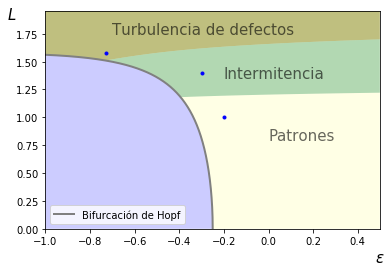

In [40]:
plt.show()

In [218]:
e_bf

-0.7302464745060011